In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("advertising.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [3]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
m = len(data)

X = data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp', 'Clicked on Ad'], axis = 1).to_numpy()
y = data['Clicked on Ad'].to_numpy().reshape((m, 1))

In [5]:
n = len(X[0])

for i in range(n - 1):
    mean_x = np.mean(X[:][i])
    std_x = np.std(X[:][i])
    for j in range(m):
        X[j][i] = (X[j][i] - mean_x) / std_x

In [6]:
ones = np.ones((m, 1))

X = np.concatenate((ones, X), axis = 1)

X.shape

(1000, 6)

In [7]:
def train_test_split(X, y, s = 0.3):
    assert(X.shape[0] == y.shape[0])
    m = X.shape[0]
    val = int(m - m * s)
    
    indices = np.arange(m)
    np.random.shuffle(indices)

    A = X[indices]
    B = y[indices]
    
    X_train = A[:val + 1]
    y_train = B[:val + 1]
    
    X_test = A[val + 1:]
    y_test = B[val + 1:]
    
    return X_train, y_train, X_test, y_test

In [8]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

In [9]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

In [10]:
def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [11]:
def forward(thetas, X):
    a_s = []
    z_s = []
    a = X
    a_s.append(a)
    z_s.append(a)
    for i in range(len(thetas)):
#         print(a.shape, thetas.shape)
        z = a @ thetas[i].T
        a = sigmoid(z)
        if i != len(thetas) - 1:
            a = np.concatenate(([[1.0] for i in range(len(a))], a), axis = 1)
        z_s.append(z)
        a_s.append(a)
    
    return a_s, z_s

In [12]:
def cost(thetas, X, y, m):
    a_s, z_s = forward(thetas, X)
    J = -1 * np.sum(y.T @ np.log(a_s[-1]) + (1 - y).T @ np.log(1 - a_s[-1])) / m
    return J

In [13]:
def backward(thetas, X, y, a_s, z_s):
    D_s = []
    
    d = a_s[-1] - y
    for i in range(len(thetas) - 1, -1, -1):
        D = d.T @ a_s[i]
        D_s.append(D)
        
        if i != 0:
            z_der = sigmoid_der(z_s[i])
            z_der = np.concatenate(([[1.0] for i in range(len(z_der))], z_der), axis = 1)
            d = (d @ thetas[i]) * z_der
            d = d[:, 1:]
    
    D_s = np.array(D_s[::-1])
    return D_s

In [54]:
def train_model(X, y, lr = 0.1):
    m = X.shape[0]
    thetas = def_thetas(X.shape[1], [7, 5, 3], 1)
    
    J = []
    cost0 = cost(thetas, X, y, m)
    J.append(cost0)
    for i in range(10000):
        a_s, z_s = forward(thetas, X)
        D_s = backward(thetas, X, y, a_s, z_s)
        thetas = thetas - lr * D_s / m
        
        cost1 = cost(thetas, X, y, m)
        J.append(cost1)
        if cost1 == 0 or cost1 > cost0:
            thetas = thetas + lr * D_s / m
            print(i)
            break
        cost0 = cost1
    
    return J, thetas

In [55]:
def pred(thetas, X):
    a_s, z_s = forward(thetas, X)
    h = a_s[-1]
    h[h >= 0.5] = 1.0
    h[h < 0.5] = 0.0
    
    return h

In [56]:
def def_thetas(inp, hid, out):
    arr = []
    arr.append(np.random.randn(hid[0], inp))
    for i in range(len(hid) - 1):
        arr.append(np.random.randn(hid[i + 1], hid[i] + 1))
    
    arr.append(np.random.randn(out, hid[-1] + 1))
    return np.array(arr)

In [57]:
J, thetas = train_model(X_train, y_train)

thetas

array([array([[ 0.73936834,  0.68463053, -0.28593656,  0.96303851, -0.00443041,
         0.44105583],
       [-0.63536251, -1.15984877,  0.41174954, -1.12413949,  0.40961863,
        -0.55034287],
       [ 0.04668898, -0.24443785, -0.86554454, -0.65694049, -0.77449624,
         0.4436252 ],
       [ 2.47182389, -0.93025419, -2.37501821, -0.58863242, -2.11372206,
         0.09986882],
       [-0.66977448, -0.12291735, -0.84688099, -1.55975746,  3.4260362 ,
         0.16323539],
       [-1.69160206, -0.3021714 ,  0.28712156,  1.87052915,  0.0663027 ,
         0.40059935],
       [-0.01209988,  0.63970613,  0.4839577 , -0.25382638, -0.41559666,
        -1.54476965]]),
       array([[-0.05145968,  0.10669051, -2.84997904, -1.40971729, -0.82342142,
         0.52201483,  0.60826678,  0.64870799],
       [ 1.45929897, -0.54276338,  0.20366422, -0.75139405,  0.53260629,
         1.45832024,  2.61244856,  0.31059623],
       [ 0.89640565,  0.13745101,  0.38569378,  1.53875628,  1.98819801,
    

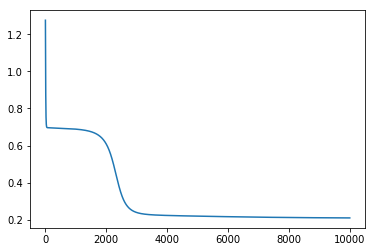

In [58]:
plt.plot(J)

In [59]:
y_pred = pred(thetas, X_test)
accuracy = 0
TP, TN, FP, FN = 0, 0, 0, 0
n = X_test.shape[0]

for i in range(n):
    if y_pred[i] == y_test[i]:
        if y_pred[i] == 1:
            TP += 1
        else:
            TN += 1
        accuracy += 1
    else:
        if y_pred[i] == 1:
            FP += 1
        else:
            FN += 1

accuracy /= n
accuracy

0.8996655518394648

In [60]:
precision = TP / (TP + FP)
precision

0.9214285714285714

In [61]:
recall = TP / (TP + FN)
recall

0.8716216216216216

In [62]:
F1 = 2 * precision * recall / (precision + recall)
F1

0.8958333333333333

In [63]:
TP, TN, FP, FN

(129, 140, 11, 19)